<a href="https://colab.research.google.com/github/alonsomoros/colab/blob/main/2_2_1_Auto_encoders_Mi_primer_AE_con_Keras_Enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img style="float: right; width: 80px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Mi primer AE con Keras<a id="top"></a>

<i><small>Authors: Félix José Fuentes Hurtado<br>Last update: 2023-09-29</small></i></div>

***

### Mi primer AutoEncoder con Keras

En este notebook vamos a ver cómo podemos implementar un autoencoder paso a paso. Todos los ejemplos están extraídos del propio blog de Keras, aquí tenéis el [enlace](https://blog.keras.io/building-autoencoders-in-keras.html) para su consulta.

Comenzemos recordando qué es un autoencoder. Para ello, mirad la imagen siguiente:

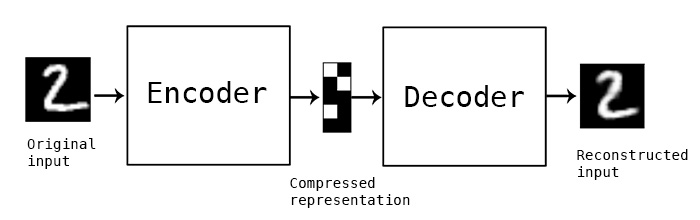

En ella podemos observar como consta de dos bloques: el encoder y el decoder.

Por una parte, el **encoder** toma los datos de entrada y los comprime en una representación mucho más compacta.

Por la otra, el **decoder** coge esa representación (o codificación) comprimida y trata de reconstruir los datos originales con el menor error posible.

A lo largo de esta práctica haremos lo siguiente:

* Empezaremos con un AutoEncoder muy simple, en el que tanto el encoder como el decoder tendrán una sola capa Densa.
* Complicaremos un poco más la arquitectura añadiendo más capas

**¡Comenzemos!**

Vamos a construir el AutoEncoder más simple posible:

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Ahora necesitamos compilarlo con la función `compile` de Keras. Como optimizador utilizaremos `Adam` con sus valores por defecto (búscalos en la documentación de Keras) y como función de pérdidas la entropía cruzada binaria (busca cómo elegirla en la documentación de Keras).

In [26]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy') #adam o RMSprop

Ya tenemos nuestro modelo configurado. Ahora vamos a por los datos. Vamos a trabajar con el conjunto de datos más sencillo y utilizado que existe en el Deep Learning: el MNIST.

Keras nos lo ofrece directamente en su API:

In [27]:
from keras.datasets import mnist
import numpy as np #En python las _ son valores que no se van a usar, y en este caso las _ son las Y que en IAs representaban Etiquetas
(x_train, _), (x_test, _) = mnist.load_data()

Recordad que siempre que trabajemos con redes neuronales será importante normalizar/estandarizar nuestros datos. En este caso, vamos a normalizarlos.

Como son imágenes codificadas en uint8, significa que tenemos 8 bits, lo que da lugar a $2^{8}-1$ valores.

De acuerdo a esto, normaliza los datos.

In [28]:
x_train = x_train.astype('float32') / 255 #En la primera prática lo dividiamos directamente
x_test = x_test.astype('float32') / 255

Una vez normalizado, y debido a que estamos implementando una red neuronal *densa* que toma como entrada vectores de datos, deberemos **vectorizar** los datos. Es decir, convertirlos de matriz a vector.

Esto os debería dar un vector de `train` de dimensiones `(60000, 784)` y uno de `test` de `(10000, 784)`. Comprobadlo.

In [29]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Y ya lo tenemos todo listo. Ahora nos queda entrenar el modelo con la función `fit`.

Los parámetros que elegiremos para este entrenamiento son 50 épocas, un tamaño de batch de 256, aleatorizaremos las muestras en cada época, y validaremos con los datos de `x_test, x_test`.

**Pregunta**: ¿Por qué usamos como conjunto de validación `(x_test, x_test)` en lugar de `(x_test, y_test)` como haríamos habitualmente?

**Respuesta**: Porque en discriminativas no se usan etiquetas, que son el valor de las Y'es

In [30]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) #60.000 / 256 = 234,375 veces -> 235 aprox
                # En algunos AE se usa una función que controla la pérdida en cada
                # epoch y si el error no cambia y la neurona no mejora, se deja de entrenar
                #                   ||
                #                   ||
                #                  \  /
                #                   \/
                # EarlyStopping class (función para monitorizar)
                #
                # Loss -> training - Val_loss -> training


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0917 - val_loss: 0.0907
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0916 - val_loss: 0.0907
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0916 - val_loss: 0.0908
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0914 - val_loss: 0.0908
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0916 - val_loss: 0.0907
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0914 - val_loss: 0.0910
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0916 - val_loss: 0.0908
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0916 - val_loss: 0.0908
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0916 - val_loss: 0.0908
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0915 - val_loss: 0.0908
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Ya tenemos nuestra red entrenada. Vamos ahora a visualizar algunos casos:

In [31]:
# Encode and decode some digits
# Podemos elegir entre la muestra del tipo test y los de entrenamiento
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

encoded_imgs_test = encoder.predict(x_train)
decoded_imgs_test = decoder.predict(encoded_imgs_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


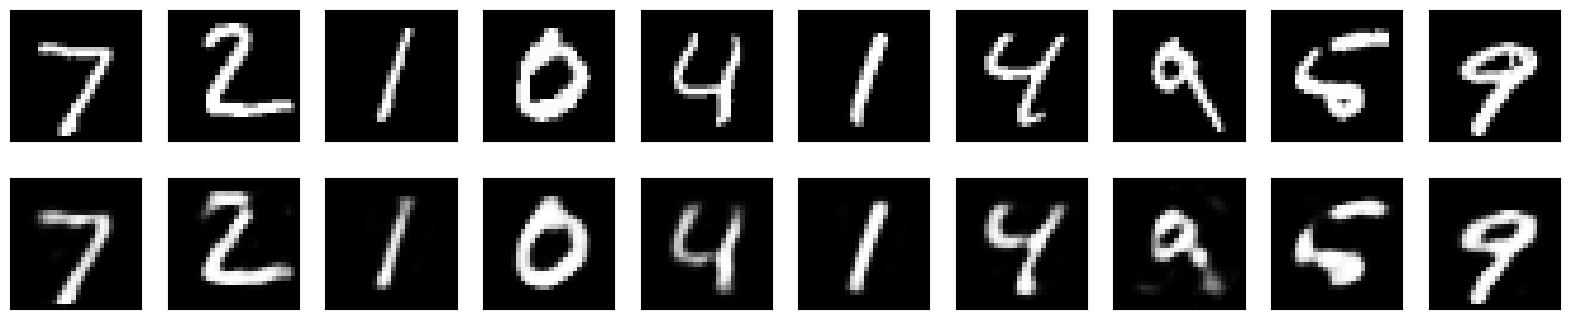

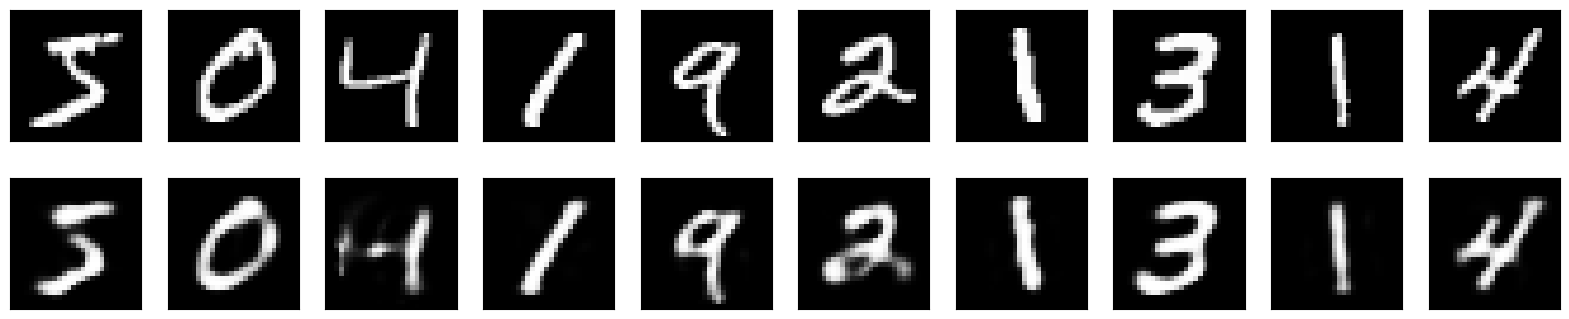

In [32]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# --------------------------------------------

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



¡Fijaos lo fácil que ha sido, ya tenemos nuestro primer autoencoder funcionando!

 Lo que está ocurriendo es que el autoencoder está calculando una representación comprimida de los datos (lo que obtenemos a la salida del encoder) que no es otra cosa que una aproximación a lo que obtendríamos si aplicásemos una PCA. Si no sabéis de lo que estamos hablando, os recomiendo que veáis el video de Geoffrey Hinton "[From PCA to autoencoders](https://www.youtube.com/watch?v=PSOt7u8u23w)".

Vamos a complicar un poco el asunto. Vamos a convertir nuestro autoencoder en un **deep** autoencoder. ¿Cómo? Añadiendo más capas al encoder y al decoder.

En este caso, vamos a crear un autoencoder con:

Para el encoder:

- Capa Densa, 128 neuronas y función de activación ReLU
- Capa Densa, 64 neuronas y función de activación ReLU
- Capa Densa, 32 neuronas y función de activación ReLU

Para el decoder:

- Capa Densa, 32 neuronas y función de activación ReLU
- Capa Densa, 64 neuronas y función de activación ReLU
- Capa Densa, 128 neuronas y función de activación Sigmoid

In [ ]:
# Usa la API Funcional de Keras
# https://keras.io/guides/functional_api/

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

**Pregunta**: ¿Por qué creeis que en el decoder van reduciendose el número de neuronas y en el decoder aumentando?

**Respuesta**: Porque creas más filtros y reduces la dimensión de la imagen y viceversa.

**Pregunta**: ¿Por qué utilizamos la función de activación **sigmoid** en la última capa?

**Respuesta**:

Una vez configurado el modelo, podemos **crear el modelo** (mira la clase `keras.Model`) y compilarlo (usaremos de nuevo `Adam` y la entropía cruzada binaria.

In [ ]:
autoencoder = keras.Model(## Tu código aquí ##)
autoencoder.compile(## Tu código aquí ##)

Y, por último, entrenaremos el modelo. En esta ocasión lo ejecutaremos durante 100 épocas, con un tamaño de batch de 256, aleatorización de las muestras y conjunto de validación `x_test, x_test`.

In [ ]:


autoencoder.fit(x_train, x_train,
                ## Tu código aquí ##
                )

Fijaos en cómo las pérdidas que obtenemos ahora son un poco mejores: de ~0.09 que obteníamos antes en validación, a ~0.08.

Vamos ahora a visualizar algunos casos:

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()